### evaluation on test data

In [277]:
from utils import pickle_load
from matplotlib import cm
import collections
def show_results(res_paths):
    results = {}
    for path in res_paths:
        result = pickle_load(path)
        for k, v in result.items():
            if k not in results.keys():
                results[k] = result[k]
    results = collections.OrderedDict(sorted(results.items()))
    fig, ax = plt.subplots(figsize=(9, 5.5))
    colors = cm.Dark2(np.linspace(0, 1, len(results)))
    count = 0
    for k, res in results.items():
        mean, std = np.nanmean(res, axis=0), np.nanstd(res, axis=0)
        #ax.errorbar(np.arange(mean.shape[0]), mean, yerr=std, color=colors[count], label=k, fmt='-o')
        plt.plot(np.arange(mean.shape[0])+1, mean, '-o', color=colors[count], label=k)
        count += 1
        print(np.array_str(mean[8:], precision=3))
        print("Average precision of %s for future prediction: %f" % (k, mean[8:].mean()))

    # Now add the legend with some customizations.
    legend = ax.legend(loc='upper right')
    
    ax.set_xlabel("time step")
    ax.set_ylabel("average precision")
    
    plt.axvline(x=8.5, color='r', linestyle='--')
    plt.text(3, 0.1, 'tracking', fontsize=18, color='grey')
    plt.text(11, 0.1, 'prediction', fontsize=18, color='grey')
    #print(mean)
    

#     # Set the fontsize
#     for label in legend.get_texts():
#         label.set_fontsize('small')

    #plt.savefig("/home/ful7rng/Desktop/thesis/writting_materials/test_on_real_data.png")
    plt.show()

In [287]:
def show_best(filename, metric, k=1):

    def line_to_list(line):
        exclude_next_line = lambda x: x[:-1] if x.endswith('\n') else x
        entries = map(exclude_next_line, line.split(','))
        return entries

    items = []

    def print_dict(dic, attrs=None):

        if attrs is None:
            attrs = ['omega', 'noise_var', 'extent', metric, metric + ' mean']
            if 'keep_motion' in dic and dic['keep_motion']:
                attrs += ['window_size', 'initial_motion_factor', 'keep_motion_factor']
            if 'blur_spatially' in dic and dic['blur_spatially']:
                attrs += ['blur_extent', 'blur_var']

        for k, v in dic.items():
            if attrs is not None and k not in attrs:
                continue
            print("{}: {}".format(k, v))

    with open(filename, 'r') as f:
        line = f.readline()
        #print(line)
        attrs = line_to_list(line)

        for i, line in enumerate(f):
            #print(line)
            values = line_to_list(line)
            #print(values)
            dict_ = {k: v for (k, v) in zip(attrs, values)}
            items.append(dict_)
    #print(items[0])

    items = sorted(items, key=lambda item: item[metric + ' mean'])
    if metric == 'f1_score' or metric == 'average_precision':
        items = items[::-1]

    for i in range(k):
        print("------- {}th best ------- ".format(i+1))
        print_dict(items[i])

### on simulated data

In [251]:
path = '/home/ful7rng/projects/transition/propagation/results/01_True_simluated_scenes_16_num_steps_all_data_04_DIAGONAL_TRUE_CONDITIONAL_TRUE_model/measurement_lost_8_average_precision_results.pkl'

In [298]:
# simulated conditional BOFUM
summary_path = '/home/ful7rng/projects/transition/propagation/results/04_DIAGONAL_TRUE_CONDITIONAL_TRUE/simulated_scenes_True_conditionalBOFUM_keep_motion_False_blur_spatially_False_keep_naive_bofum_False_num_scenes_500_tries_100/summary.csv'
show_best(summary_path, 'average_precision', 2)

------- 1th best ------- 
average_precision mean: 0.516907942026
noise_var: 0.372650880654
average_precision: [ 0.812  0.679  0.598  0.534  0.466  0.398  0.344  0.305]
extent: 7
omega: 0.0353639265597
------- 2th best ------- 
average_precision mean: 0.516553253571
noise_var: 0.328514687029
average_precision: [ 0.805  0.676  0.593  0.532  0.467  0.399  0.348  0.312]
extent: 7
omega: 0.0405314508315


In [299]:
# simulated  BOFUM
summary_path = '/home/ful7rng/projects/transition/propagation/results/naiveBOFUM_/simulated_scenes_True_num_scenes_500_tries_100/summary.csv'
show_best(summary_path, 'average_precision', 2)

------- 1th best ------- 
average_precision mean: 0.472658519658
noise_var: 0.555536471101
average_precision: [ 0.808  0.668  0.576  0.492  0.413  0.336  0.268  0.22 ]
extent: 7
omega: 0.0164534434234
------- 2th best ------- 
average_precision mean: 0.472351591907
noise_var: 0.544426203815
average_precision: [ 0.802  0.663  0.573  0.493  0.412  0.338  0.272  0.226]
extent: 7
omega: 0.0389900284832


[ 0.785  0.637  0.552  0.479  0.416  0.358  0.311  0.252]
Average precision of BOFMP for future prediction: 0.473655
[ 0.767  0.599  0.5    0.416  0.349  0.279  0.232  0.192]
Average precision of BOFUM for future prediction: 0.417003


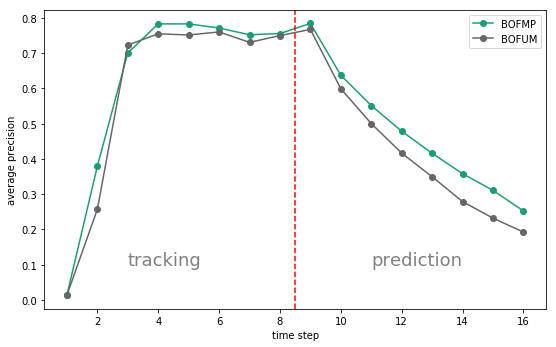

In [263]:
show_results([path])

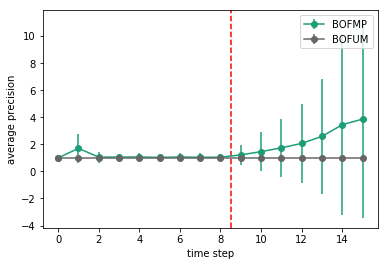

In [160]:
show_results_1(path)

### on real data

#### naiveBOFUM

In [300]:
# simulated  BOFUM
summary_path = '/home/ful7rng/projects/transition/propagation/results/naiveBOFUM_/simulated_scenes_False_num_scenes_500_tries_100/summary.csv'
show_best(summary_path, 'average_precision', 2)

------- 1th best ------- 
average_precision mean: 0.302022141155
noise_var: 0.676892668163
average_precision: [ 0.544  0.419  0.339  0.311  0.262  0.216  0.178  0.148]
extent: 5
omega: 0.152265835237
------- 2th best ------- 
average_precision mean: 0.301322544075
noise_var: 0.64664140932
average_precision: [ 0.537  0.401  0.33   0.305  0.264  0.225  0.189  0.159]
extent: 5
omega: 0.117980852605


#### conditional BOFUM

In [219]:
real_data_res_path = '/home/ful7rng/projects/transition/propagation/results/02_False_simluated_scenes_16_num_steps_all_data_longer_than_4_max_scenes_None_model/measurement_lost_8_average_precision_results.pkl'

In [296]:
summary_path = '/home/ful7rng/projects/transition/propagation/results/04_DIAGONAL_TRUE_CONDITIONAL_TRUE/simulated_scenes_False_conditionalBOFUM_keep_motion_False_blur_spatially_False_keep_naive_bofum_False_num_scenes_500_tries_100/summary.csv'
show_best(summary_path, 'average_precision', 2)

------- 1th best ------- 
average_precision mean: 0.321048144231
noise_var: 0.644828151836
average_precision: [ 0.559  0.434  0.361  0.321  0.273  0.223  0.209  0.188]
extent: 5
omega: 0.191234382275
------- 2th best ------- 
average_precision mean: 0.320907665314
noise_var: 0.648251784882
average_precision: [ 0.558  0.435  0.361  0.322  0.273  0.223  0.209  0.187]
extent: 5
omega: 0.181301712082


### on real data and blur spatially

In [289]:
summary_path = '/home/ful7rng/projects/transition/propagation/results/04_DIAGONAL_TRUE_CONDITIONAL_TRUE/simulated_scenes_False_conditionalBOFUM_keep_motion_False_blur_spatially_True_keep_naive_bofum_False_num_scenes_500_tries_100/summary.csv'
show_best(summary_path, 'average_precision', 2)

------- 1th best ------- 
blur_extent: 5
blur_var: 1.09280355491
average_precision mean: 0.326868299413
noise_var: 0.635747744503
average_precision: [ 0.554  0.427  0.358  0.332  0.286  0.238  0.222  0.197]
extent: 5
omega: 0.0996668473785
------- 2th best ------- 
blur_extent: 3
blur_var: 1.25908273379
average_precision mean: 0.3254649435
noise_var: 0.666737395778
average_precision: [ 0.563  0.44   0.369  0.332  0.276  0.225  0.21   0.188]
extent: 5
omega: 0.170016978683


In [220]:
blur_spatially_res_path = '/home/ful7rng/projects/transition/propagation/results/04_False_simluated_scenes_16_num_steps_04_DIAGONAL_TRUE_CONDITIONAL_TRUE_model_all_data_longer_than_4_max_scenes_None_spatially_blur/measurement_lost_8_average_precision_results.pkl'

### on real data and keep motion

In [295]:
summary_path = '/home/ful7rng/projects/transition/propagation/results/04_DIAGONAL_TRUE_CONDITIONAL_TRUE/simulated_scenes_False_conditionalBOFUM_keep_motion_True_blur_spatially_False_keep_naive_bofum_False_num_scenes_500_tries_100/summary.csv'
show_best(summary_path, 'average_precision', 2)

------- 1th best ------- 
average_precision mean: 0.381184820688
window_size: 4
keep_motion_factor: 0.706594184009
noise_var: 0.743921945138
average_precision: [ 0.617  0.521  0.44   0.4    0.333  0.283  0.249  0.206]
extent: 7
initial_motion_factor: 0.562946012048
omega: 0.0263632138087
------- 2th best ------- 
average_precision mean: 0.376659689071
window_size: 4
keep_motion_factor: 0.616124805029
noise_var: 0.448096377953
average_precision: [ 0.61   0.514  0.446  0.401  0.329  0.272  0.24   0.201]
extent: 7
initial_motion_factor: 0.748927946091
omega: 0.0356520764546


In [284]:
keep_motion_res_path = '/home/ful7rng/projects/transition/propagation/results/05_False_simluated_scenes_16_num_steps_04_DIAGONAL_TRUE_CONDITIONAL_TRUE_model_all_data_longer_than_4_max_scenes_None_keep_motion/measurement_lost_8_average_precision_results.pkl'

In [285]:
res_paths = [real_data_res_path, blur_spatially_res_path, keep_motion_res_path]

[ 0.705  0.57   0.468  0.424  0.351  0.336  0.305  0.255]
Average precision of BOFMP for future prediction: 0.427077
[ 0.762  0.675  0.561  0.496  0.405  0.353  0.305  0.238]
Average precision of BOFMP with motion keeping for future prediction: 0.474432
[ 0.694  0.564  0.48   0.439  0.371  0.349  0.311  0.264]
Average precision of BOFMP with spatial blurring for future prediction: 0.433984
[ 0.67   0.512  0.384  0.314  0.252  0.205  0.167  0.148]
Average precision of BOFUM for future prediction: 0.331549


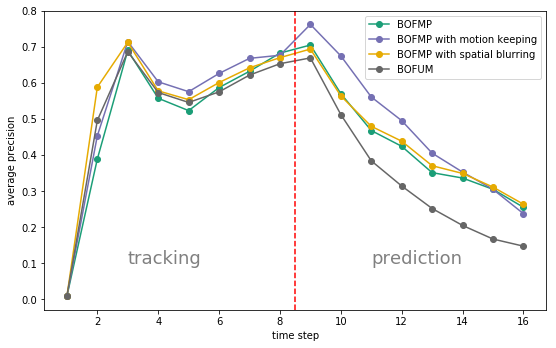

In [286]:
show_results(res_paths)